## 음악 장르 분류 
   2293016 신주현
- 사용한 데이터셋

  GTZAN (https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)

In [20]:
import os                         # 파일과 디렉토리 경로 관리
import kagglehub                  # 캐글 데이터셋 불러옴
import numpy as np                # 배열
import pandas as pd               # 데이터 조작 및 분석용 데이터프레임
from sklearn.model_selection import train_test_split      # 데이터셋을 학습용과 테스트용으로 분리
from sklearn.ensemble import RandomForestClassifier       # 랜덤포레스트 알고리즘
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # 모델성능평가도구
import seaborn as sns             # 데이터 시각화 라이브러리
import matplotlib.pyplot as plt   # 그래프 시각화

- os, kagglehub: 파일 경로 관리와 Kaggle 데이터셋 다운로드.
- numpy, pandas: 데이터 조작 및 분석.
- scikit-learn: 모델 학습, 평가, 데이터 분리.
- seaborn, matplotlib: 시각화 도구.

In [21]:
# KaggleHub을 이용해 데이터 다운로드
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\tlswn\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1


In [22]:
# 경로 설정
audio_folder = os.path.join(path, "Data/genres_original")
genres = os.listdir(audio_folder)

In [23]:
data_path=os.path.join(path,"Data/features_3_sec.csv")
data = pd.read_csv(data_path)

# 데이터의 첫 5줄 확인
print(data.head())

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.05


- filename : 오디오 파일 이름 (장르.인덱스.세그먼트번호)
- length : 오디오 파일 길이 
- chroma_stft_mean(평균) & chroma_stft_var(분산) (Chroma Short-Time Flourier Transform) : 주파수 스펙트럼 크기 12개 피치 클래스로 요악, 멜로디 또는 화음과 관련된 정보 캡처
- rms_mean & rms_var (Root Mean Square) : 신호 에너지 측정(오디오 음량크기)
- spectral_centroid_mean & spectral_centroid_var : 스펙트럼 중심 (가중 평균 주파수), 음색 특징 짓는데 사용
- spectral_bandwidth_mean & spectral_bandwidth_var : 스펙트럼 대역폭 (주파수 분포 폭), 음색과 다이나믹 구분에 도움
- rolloff_mean & rolloff_var - Spectral Rolloff : 신호의 총 에너지 중 특정 백분율(약 85%)이 포함되는 주파수, 오디오의 고주파수 콘텐츠
- zero_crossing_rate_mean & zero_crossing_rate_var : 신호값이 0을 지나칠 때의 빈도(진동성), 소리의 음질과 텍스처 분석
- harmony_mean & harmony_var : 신호의 하모니 (화음)
- perceptr_mean & perceptr_var : 오디오의 지각적 특징(음향적 감각 관련), 사람의 청각적 특성을 모델링.
- tempo : 음악의 속도(분당 비트 수), 음악의 리듬 표현
- mfcc1_mean ~ mfcc20_var - MFCC (Mel-Frequency Cepstral Coefficients) : 주파수 도메인에서 음향 특징을 요약한 값, 음성 신호 처리와 음악 분류에서 가장 중요한 특징
- label - 오디오 장르

In [24]:
# 열 이름 확인
print("Column names:", data.columns)

Column names: Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'm

In [25]:
# 데이터 분리
X = data.drop(columns=['filename', 'label'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X 특징과 y 레이블로 데이터를 분리한 후 

학습/데스트 데이터로 나누어

train_test_split로 80%는 학습용, 20%는 테스트용으로 분리

In [26]:
print(f"Train data size: {X_train.shape[0]} samples")
print(f"Test data size: {X_test.shape[0]} samples")

Train data size: 7992 samples
Test data size: 1998 samples


In [27]:
# 랜덤포레스트 모델
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# 모델 평가
y_pred = rf.predict(X_test)

In [29]:
# 성능 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

       blues       0.86      0.85      0.85       208
   classical       0.93      0.98      0.96       203
     country       0.77      0.83      0.80       186
       disco       0.87      0.86      0.87       199
      hiphop       0.93      0.88      0.90       218
        jazz       0.85      0.93      0.89       192
       metal       0.88      0.97      0.92       204
         pop       0.93      0.94      0.93       180
      reggae       0.91      0.88      0.90       211
        rock       0.88      0.70      0.78       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998

Accuracy: 0.88


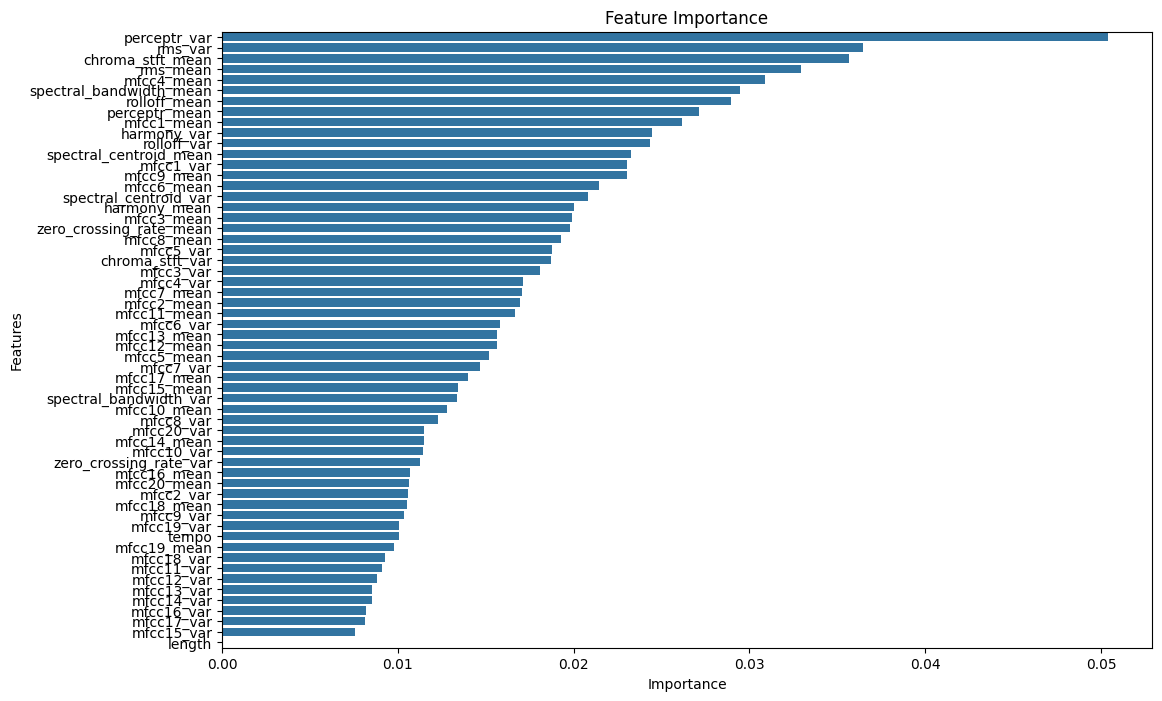

In [30]:
# 중요도 추출
importances = rf.feature_importances_

# 중요도 데이터프레임 생성
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 중요도 그래프
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [36]:
# 중요도 기반으로 특징 추출
threshold = 0.03  # 중요도 임계값 설정
feature_names = X.columns  # 열 이름 가져오기
important_features = feature_names[importances > threshold]  # 중요도 높은 특징 선택

print("Selected important features:", important_features)

# 중요한 특징들만 사용하도록 데이터 필터링
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

Selected important features: Index(['chroma_stft_mean', 'rms_mean', 'rms_var', 'perceptr_var',
       'mfcc4_mean'],
      dtype='object')


In [37]:
# 새로운 모델 학습
rf_filtered = RandomForestClassifier(n_estimators=100, random_state=42)
rf_filtered.fit(X_train_filtered, y_train)

# 새로운 데이터로 예측
y_pred_filtered = rf_filtered.predict(X_test_filtered)

# 성능 평가
print("Classification Report (Filtered Features):")
print(classification_report(y_test, y_pred_filtered))
print(f"Accuracy (Filtered Features): {accuracy_score(y_test, y_pred_filtered):.2f}")

Classification Report (Filtered Features):
              precision    recall  f1-score   support

       blues       0.53      0.56      0.55       208
   classical       0.78      0.80      0.79       203
     country       0.47      0.47      0.47       186
       disco       0.54      0.55      0.55       199
      hiphop       0.71      0.67      0.69       218
        jazz       0.53      0.65      0.58       192
       metal       0.79      0.81      0.80       204
         pop       0.77      0.74      0.75       180
      reggae       0.59      0.50      0.54       211
        rock       0.48      0.43      0.45       197

    accuracy                           0.62      1998
   macro avg       0.62      0.62      0.62      1998
weighted avg       0.62      0.62      0.62      1998

Accuracy (Filtered Features): 0.62


In [34]:
# 모든 고유 레이블 확인
labels = sorted(y_test.unique())

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# 혼동 행렬 출력 (디버깅용)
print("Confusion Matrix Shape:", conf_matrix.shape)
print("Confusion Matrix Content:")
print(conf_matrix)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix Shape: (10, 10)
Confusion Matrix Content:
[[176   1  11   5   1   6   4   0   4   0]
 [  0 199   0   0   0   4   0   0   0   0]
 [ 12   1 155   3   0  10   2   1   2   0]
 [  1   1   5 172   6   2   2   3   1   6]
 [  5   1   4   2 191   1   6   4   3   1]
 [  2   8   3   1   0 178   0   0   0   0]
 [  0   0   0   0   1   0 197   0   2   4]
 [  0   0   2   1   1   1   0 169   2   4]
 [  4   1   6   3   3   1   0   4 186   3]
 [  4   1  15  11   3   6  14   1   4 138]]
Accuracy: 0.88


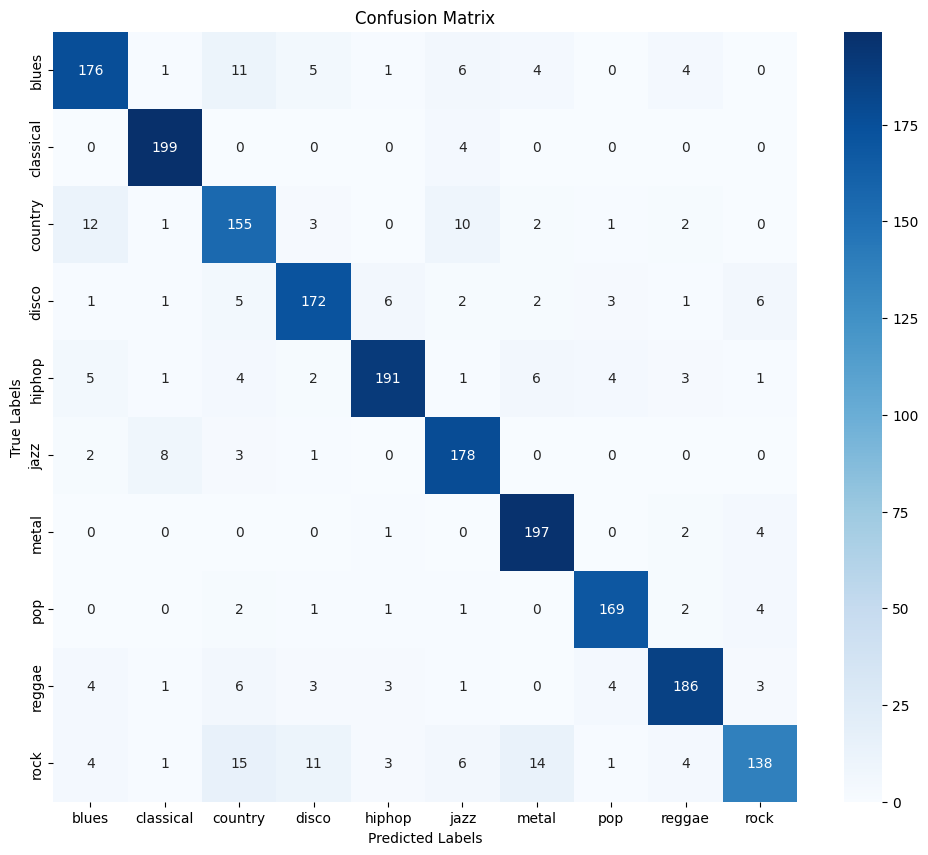

In [35]:
# 혼동 행렬 시각화
plt.figure(figsize=(12, 10))  # 크기를 확대
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### ChatGPT 에게 도움을 받은 부분
- 특징 선택 과정 중 각 특징의 중요도를 추출하고 시각화 하는 부분을 도움받음.

Q : 정확도를 높이기 위해 특징을 선택할건데 특징 중요도를 시각화하는 방법을 알려줘

A :
-- 중요도 시각화

importances = rf.feature_importances_
feature_names = X.columns

--중요도 데이터프레임 생성

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

--중요도 그래프

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

- 모델 성능 평가에 혼동 행렬을 추가하는 법을 도움받음

Q : 혼동행렬을 계산하는 법을 알려줘

A :
-- 혼동 행렬 계산

conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

-- 혼동 행렬 시각화

plt.figure(figsize=(12, 10))  # 크기를 확대
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()